In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

from tslearn.piecewise import PiecewiseAggregateApproximation
#from tslearn.piecewise import SymbolicAggregateApproximation
from pyts.approximation import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

import matrixprofile as mp
import stumpy
from scipy.cluster.hierarchy import dendrogram

In [16]:
%%time
#Y_test = pd.read_csv("RavdessTimeSeries_Y_test.csv")
Y_train = pd.read_csv("RavdessTimeSeries_Y_train.csv")

#X_test = np.load("RavdessTimeSeriesTrim_X_test.npy")
X_train = np.load("RavdessTimeSeriesTrim_X_train.npy")

#reshaped_X = np.expand_dims(X_train, axis=2)

CPU times: total: 2.77 s
Wall time: 8.8 s


# Preprocessing

    preprocessing pipeline: noise removing -> PAA -> offset translation

Noise removing (moving average) for a single time series

w=16

ts1s = pd.Series(ts1)

ts1s = ((ts1s - ts1s.mean())/ts1s.std()).rolling(window=w).mean()

ts1_cleaned = ts1s.to_numpy()

plt.plot(ts1_cleaned)

ts1_cleaned.shape

In [3]:
%%time
#20s
#noise removing

w = 16
X_list_cleaned = []

for ts_array in X_train:
    # Convert ts_array to a pandas Series
    ts_series = pd.Series(ts_array)
    
    # Calculate ts_det using rolling mean
    ts_det = ((ts_series - ts_series.mean()) / ts_series.std()).rolling(window=w).mean()
    
    # Convert ts_det back to a NumPy array
    cleaned_array = ts_det.to_numpy()
    
    X_list_cleaned.append(cleaned_array)

X_train_cleaned = np.array(X_list_cleaned)

CPU times: total: 21.2 s
Wall time: 21.1 s


In [4]:
%%time
#18min

#approximation
n_paa_segments = 2500
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_train_cleaned = paa.fit_transform(X_train_cleaned)

C:\Users\linov\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: total: 18min 33s
Wall time: 18min 34s


In [8]:
#store the preprocessed X_train
#np.save("RavdessTimeSeries_X_train_preprocessed.npy", X_train_cleaned)

# Importing Preprocessed Training set 

In [3]:
#Y_test = pd.read_csv("RavdessTimeSeries_Y_test.csv")
Y_train = pd.read_csv("RavdessTimeSeries_Y_train.csv")

#X_test = np.load("RavdessTimeSeriesTrim_X_test.npy")
X_train_cleaned = np.load("RavdessTimeSeries_X_train_preprocessed.npy")

# Mask to select specific subset 

In [17]:
mask_fearfulF = (Y_train['emotion']=='fearful')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')
indices_fearfulF = Y_train.index[mask_fearfulF]
#(Y_train["emotional_intensity"]=='normal')
#(Y_train["vocal_channel"]=='speech')

mask_fearfulM = (Y_train['emotion']=='fearful')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_fearfulM = Y_train.index[mask_fearfulM]

mask_calmF = (Y_train['emotion']=='calm')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_calmF = Y_train.index[mask_calmF]

mask_calmM = (Y_train['emotion']=='calm')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_calmM = Y_train.index[mask_calmM]

mask_surprisedF = (Y_train['emotion']=='surprised')&(Y_train['sex']=='F')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_surprisedF = Y_train.index[mask_surprisedF]

mask_surprisedM = (Y_train['emotion']=='surprised')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_surprisedM = Y_train.index[mask_surprisedM]
                                   
mask_male = (Y_train['sex']=='M')&(Y_train['statement']=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_male = Y_train.index[mask_male]

mask_female = (Y_train['sex']=='F')&(Y_train['statement']=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_female = Y_train.index[mask_female]

mask_sadM = (Y_train['emotion']=='sad')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_sadM = Y_train.index[mask_sadM]

mask_happyM = (Y_train['emotion']=='happy')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_happyM = Y_train.index[mask_happyM]
                                                
mask_angryM = (Y_train['emotion']=='angry')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_angryM = Y_train.index[mask_angryM]

mask_disgustM = (Y_train['emotion']=='disgust')&(Y_train['sex']=='M')&(Y_train["statement"]=='Kids are talking by the door')&(Y_train["emotional_intensity"]=='normal')&(Y_train["vocal_channel"]=='speech')
indices_disgustM = Y_train.index[mask_disgustM]
       
inf=False
if(inf==True):
    print("fearful F:", indices_fearfulF)
    print("fearful M", indices_fearfulM)
    print("calm F:", indices_calmF)
    print("calm M:", indices_calmM)
    print("surprised F:", indices_surprisedF)
    print("surprised M", indices_surprisedM)

In [118]:
print("mask:", indices_fearfulM)

mask: Int64Index([  36,   37,  244,  245,  452,  453,  660,  661,  868,  869, 1076,
            1077, 1284, 1285, 1492, 1493, 1700, 1701],
           dtype='int64')


## usefull plot to analyze the shapes of audio with the same emotion

In [22]:
def plot_time_series_parallel(num_elements, time_series_list1, time_series_list2):
    fig, axs = plt.subplots(num_elements, 2, figsize=(8, num_elements * 1.5), sharey=False)

    for i in range(num_elements):
        axs[i, 0].plot(time_series_list1[i])
        axs[i, 1].plot(time_series_list2[i])

        axs[i, 0].set_xticks([])
        #axs[i, 0].set_yticks([])
        axs[i, 1].set_xticks([])
        axs[i, 1].set_yticks([])

    plt.tight_layout()
    plt.show()

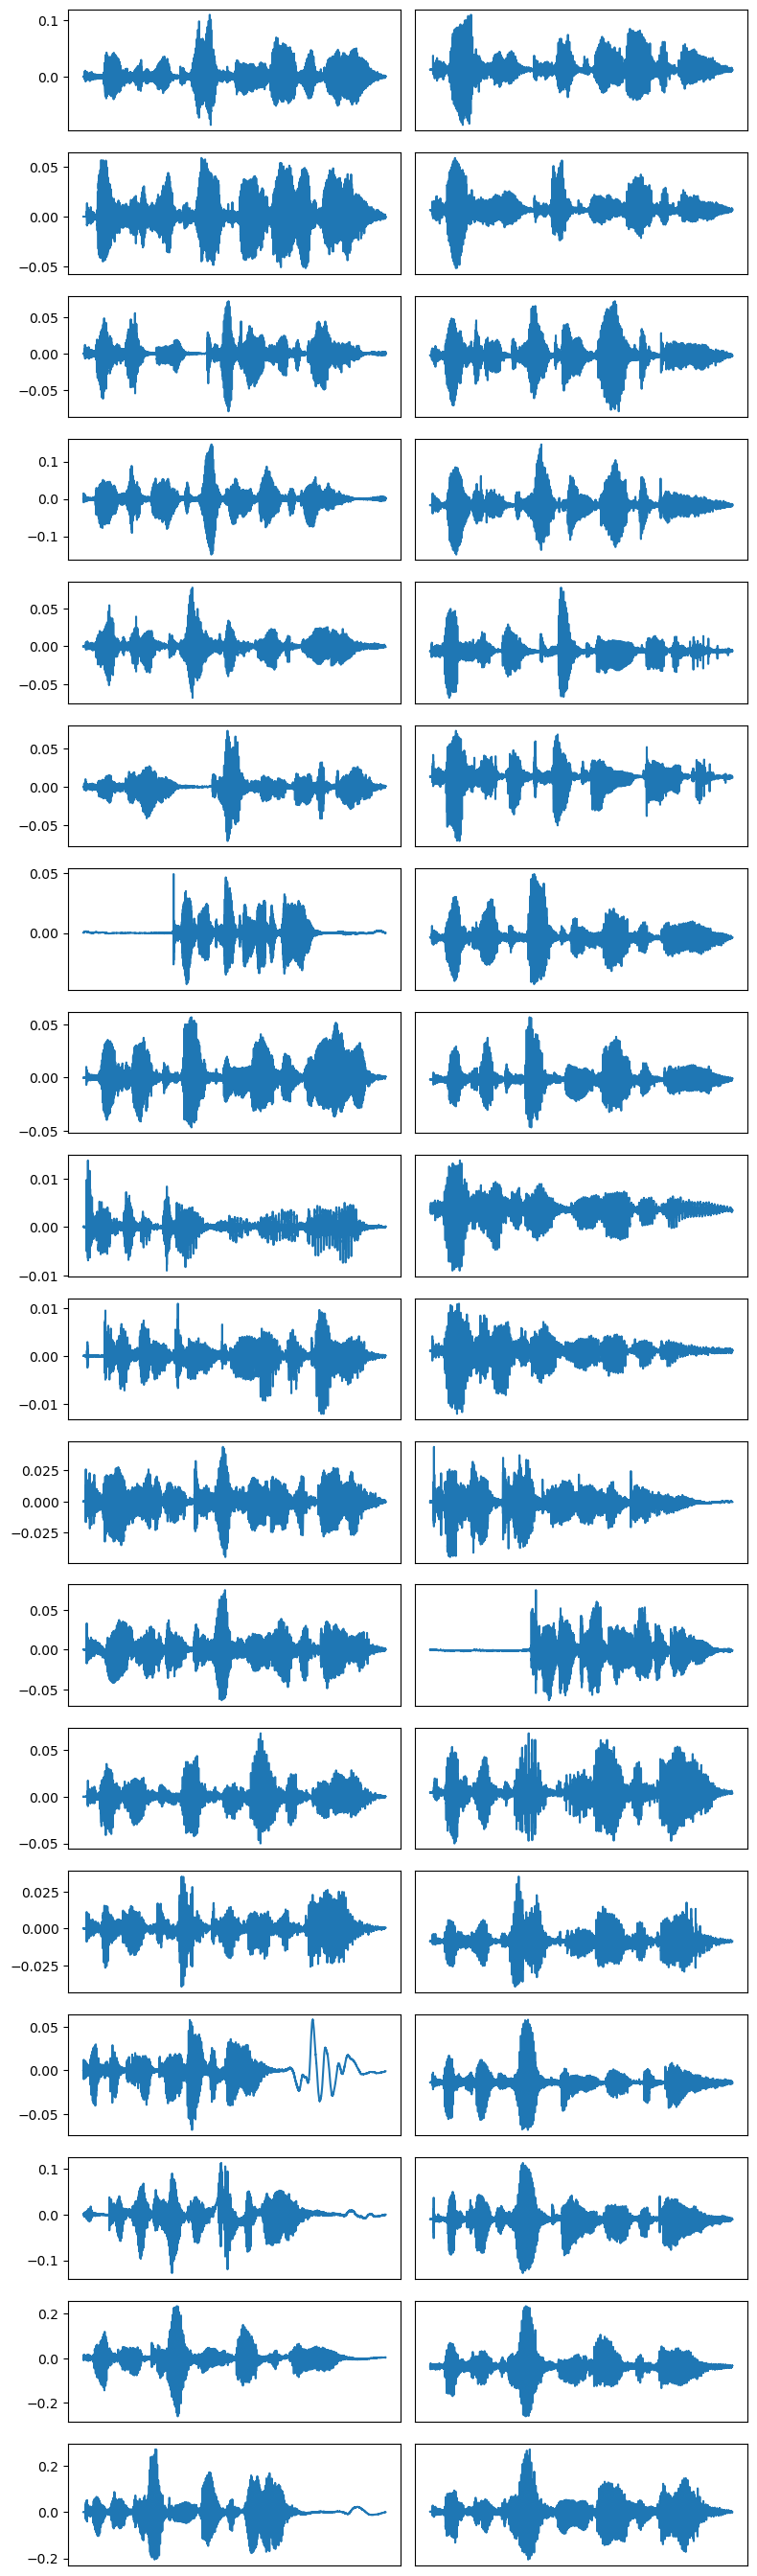

In [25]:
plot_time_series_parallel(18, X_train[indices_fearfulM], X_train[indices_calmM])

    https://matrixprofile.docs.matrixprofile.org/api.html#matrixprofile.analyze

## Clustering: Hierarchical

In [7]:
#convert Nan to 0
X_train_cleaned_ = np.nan_to_num(X_train_cleaned, copy=False)

In [78]:
%%time

X1 = X_train_cleaned_[indices_happyM]
X2 = X_train_cleaned_[indices_disgustM]
merged_X = np.concatenate((X1, X2), axis=0)
cluster = mp.discover.hierarchical_clusters(merged_X, window_size = 20, criterion='maxclust', method='weighted', t=2, n_jobs=4)

CPU times: total: 31.2 ms
Wall time: 8.55 s


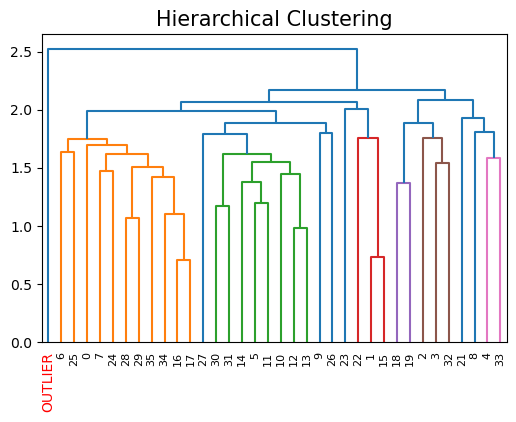

In [80]:
fig, ax = plt.subplots(figsize=(6, 4))
dendrogram(cluster['linkage_matrix'], leaf_rotation=90, ax=ax)
ax.set_title("Hierarchical Clustering", fontsize = 15)

ticks = ax.get_xticks()
labels = ax.get_xticklabels()

# Change the name and color of the leftmost tick and label
labels[0].set_text("OUTLIER")
labels[0].set_size(10)
labels[0].set_color("red")

# Set the modified tick labels
ax.set_xticklabels(labels)

plt.show()

## Clusetring: KMeans (selecting subset)

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

In [5]:
#replace NaN with 0
X_train_cleaned_ = np.nan_to_num(X_train_cleaned)

# subset of X_train
subX = X_train_cleaned_[indices_male]

# correspinding subset of Y for further analysis
subY = Y_train.loc[indices_male]
subY_indices = Y_train.index[indices_male]


subX.shape

(144, 2500)

## KMeans with dtw

In [6]:
%%time
km = TimeSeriesKMeans(n_clusters=8, metric="dtw", 
                      max_iter=1, random_state=0, n_jobs=-1)
y_pred_dtw = km.fit_predict(subX)

CPU times: total: 28min 42s
Wall time: 9min 17s


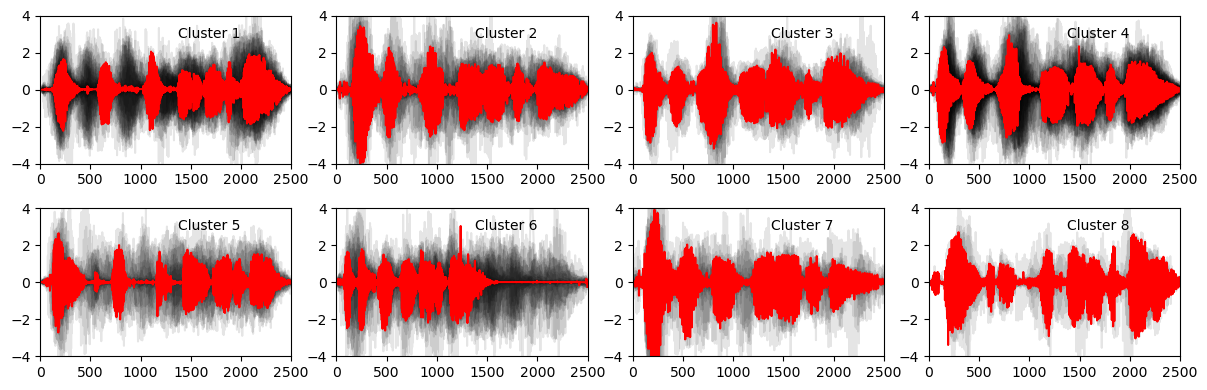

In [7]:
#source: https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html#sphx-glr-download-auto-examples-clustering-plot-kmeans-py
#Plotting the barycenter of the cluster
sz = subX.shape[1]
plt.figure(figsize=(12, 4))

for yi in range(8):
    plt.subplot(2, 4, yi+1)
    for xx in subX[y_pred_dtw == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [131]:
# Calculate the silhouette score
#labels = y_pred.labels_
silhouette_score(subX, y_pred_dtw, metric='dtw', n_jobs=-1)

0.014429448786503977

## Motif discovery on cluster results

In [174]:
# searching for common motif between cluster centroids and vowels with same emotion

In [8]:
#centroids of cluster n and time series belonging to cluster
centroid = km.cluster_centers_[6]
indices = np.where(km.labels_ == 6)[0]

In [9]:
#checking the emotion of a cluster
Ycluster_indices = subY_indices[indices]
Y_train.loc[Ycluster_indices, "emotion"].value_counts()

calm         5
neutral      2
disgust      1
sad          1
fearful      1
surprised    1
Name: emotion, dtype: int64

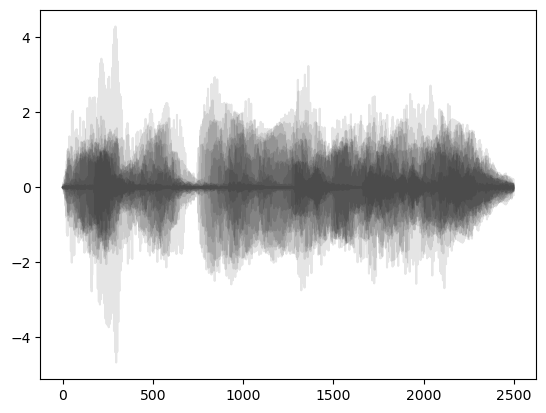

In [16]:
cluster = X_train_cleaned_[indices]
for ts in cluster:
    plt.plot(ts, color="black", alpha=0.1)
#plt.plot(centroid)

[<Figure size 1500x700 with 2 Axes>,
 <Figure size 1500x700 with 8 Axes>,
 <Figure size 1500x700 with 4 Axes>]

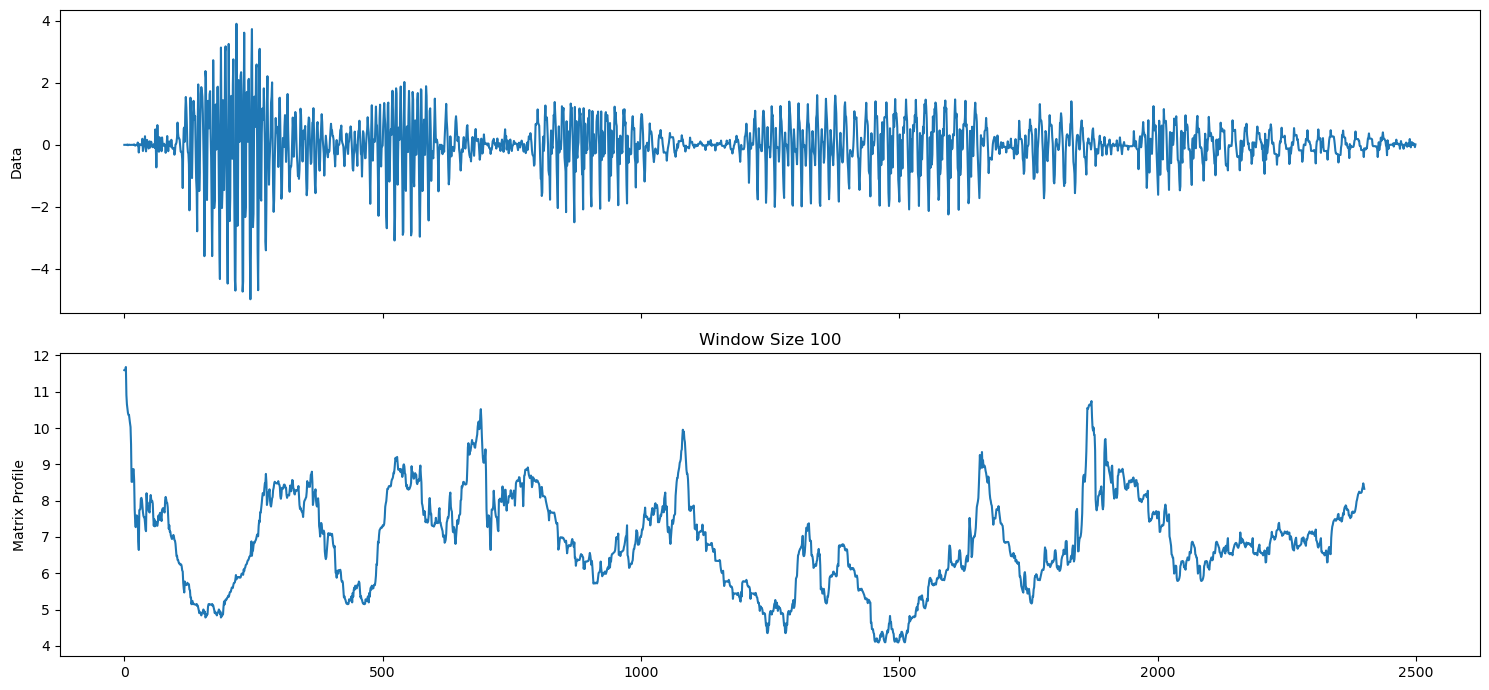

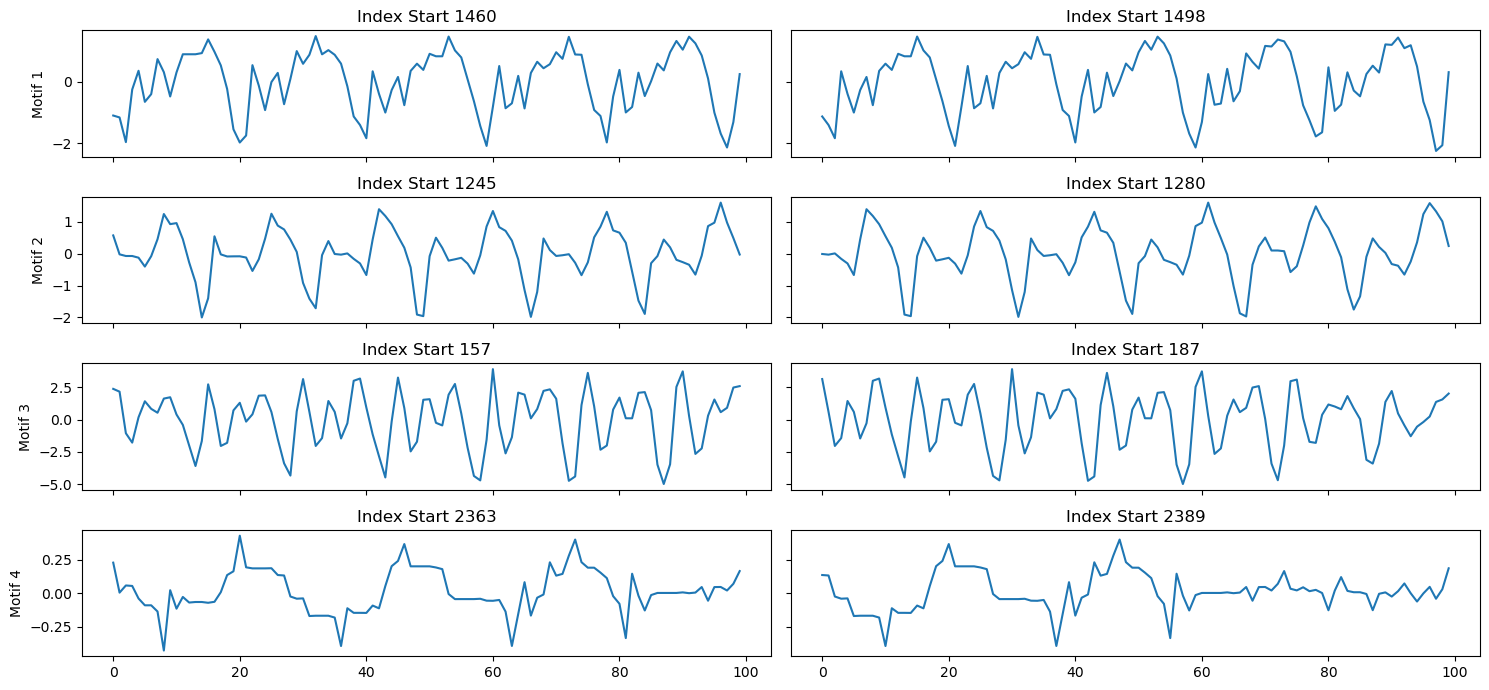

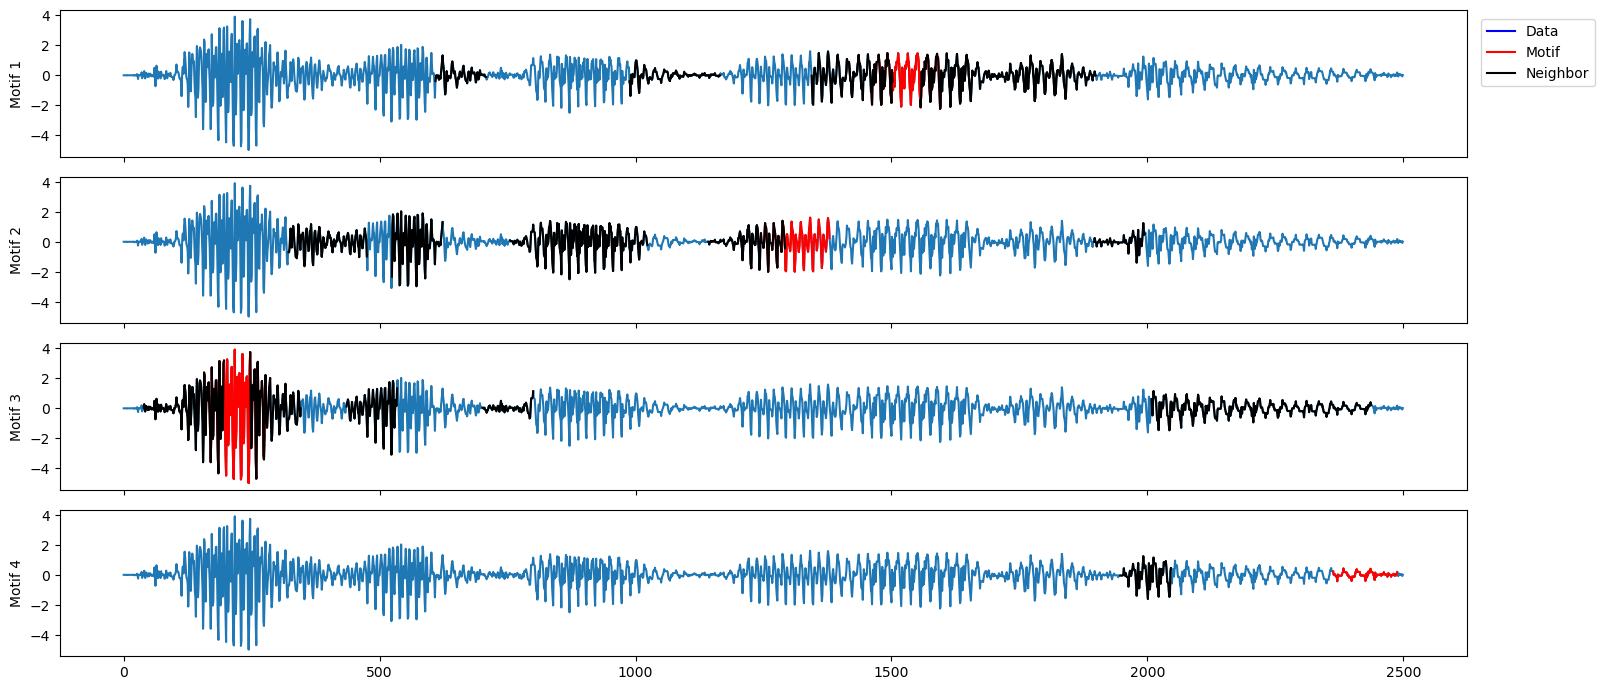

In [30]:
flattened_centroid=np.squeeze(centroid)
matrixprofile = mp.compute(flattened_centroid, windows=100)
profile = mp.discover.motifs(matrixprofile, k=4, radius=200, exclusion_zone=50)
mp.visualize(profile)

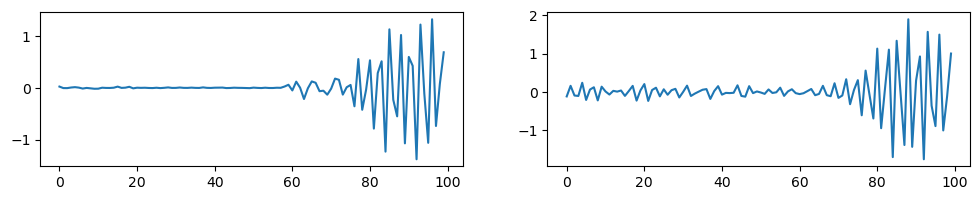

In [77]:
n=2
windows=100
matrixprofile = mp.compute(cluster[n], windows=100)
profile = mp.discover.motifs(matrixprofile, k=2)
index_motifs = profile['motifs'][0]['motifs']

fign=0
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 2))
for i in index_motifs:
    axes[fign].plot(cluster[n][i:i+windows])
    fign=fign+1

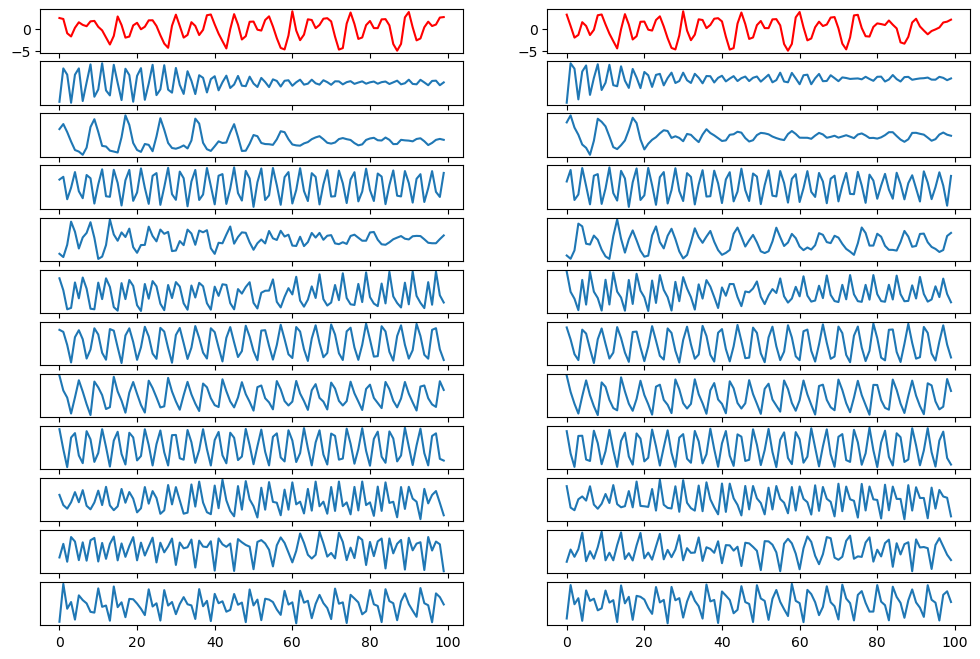

In [73]:
#plotting all motifs profile from cluster 7
w=100
fig, axes= plt.subplots(cluster.shape[0]+1, 2, sharex=False, figsize=(12, 8))

row=1
for ts in cluster:
    matrixprofile = mp.compute(ts, windows=w)
    profile = mp.discover.motifs(matrixprofile, k=4, radius=110, exclusion_zone=110)
    index_motifs = profile['motifs'][1]['motifs']
    
    column=0
    for i in index_motifs:
        axes[row][column].plot(ts[i:i+w])
        axes[row][column].set_yticks([])
        column+=1
    row+=1

#inserting the centroid motif at the top
flattened_centroid=np.squeeze(centroid)
matrixprofile = mp.compute(flattened_centroid, windows=w)
profile = mp.discover.motifs(matrixprofile, k=4, radius=100, exclusion_zone=120)
index_motifs = profile['motifs'][1]['motifs']
column=0
for i in index_motifs:
    axes[0][column].plot(flattened_centroid[i:i+w], color='red')
    column+=1

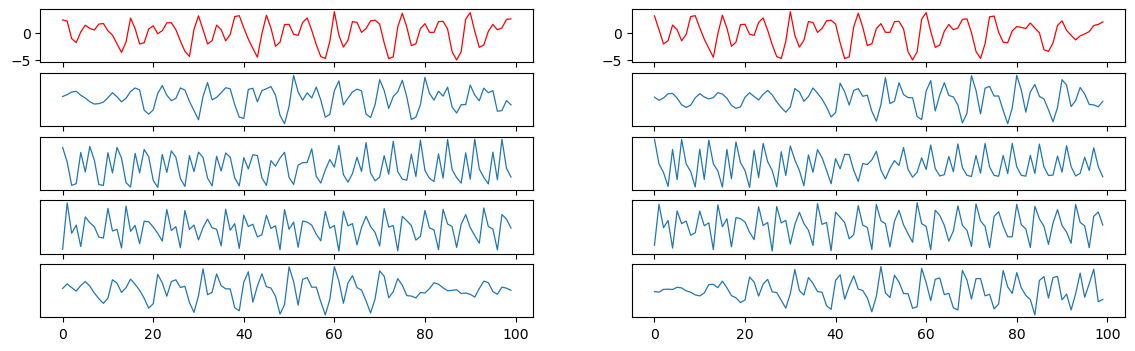

In [103]:
#Plotting similar motifs found
w=100
fig, axes= plt.subplots(5, 2, sharex=False, figsize=(14, 4))

#centroid
flattened_centroid=np.squeeze(centroid)
matrixprofile = mp.compute(flattened_centroid, windows=w)
profile = mp.discover.motifs(matrixprofile, k=4, radius=100, exclusion_zone=120)
index_motifs = profile['motifs'][1]['motifs']
column=0
for i in index_motifs:
    axes[0][column].plot(flattened_centroid[i:i+w], color='red', linewidth=0.9)
    column +=1
row=1
 
#most similar motifs in the time series belonging to the cluster
tss = [cluster[3], cluster[4], cluster[10], cluster[6]]
row=1
for ts in tss[0:3]:
    matrixprofile = mp.compute(ts, windows=w)
    profile = mp.discover.motifs(matrixprofile, k=4, radius=200, exclusion_zone=50)
    index_motifs = profile['motifs'][1]['motifs']

    column=0
    for i in index_motifs:
        axes[row][column].plot(ts[i:i+w], linewidth=0.9)
        axes[row][column].set_yticks([])
        column+=1
    row+=1

    
matrixprofile = mp.compute(tss[0], windows=w)
profile = mp.discover.motifs(matrixprofile, k=4, radius=200, exclusion_zone=40)
index_motifs = profile['motifs'][1]['motifs']
column=0
for i in index_motifs:
    axes[row][column].plot(tss[0][i+40:i+w+40], linewidth=0.9)
    axes[row][column].set_yticks([])
    column+=1

## Shapelets

## KMeans with euclidean

In [169]:
%%time
km = TimeSeriesKMeans(n_clusters=8, metric="euclidean", 
                      max_iter=50, random_state=42, n_jobs=-1)
y_pred = km.fit_predict(subX)
y_pred

CPU times: total: 3.28 s
Wall time: 2.63 s


array([3, 2, 3, ..., 3, 2, 3], dtype=int64)

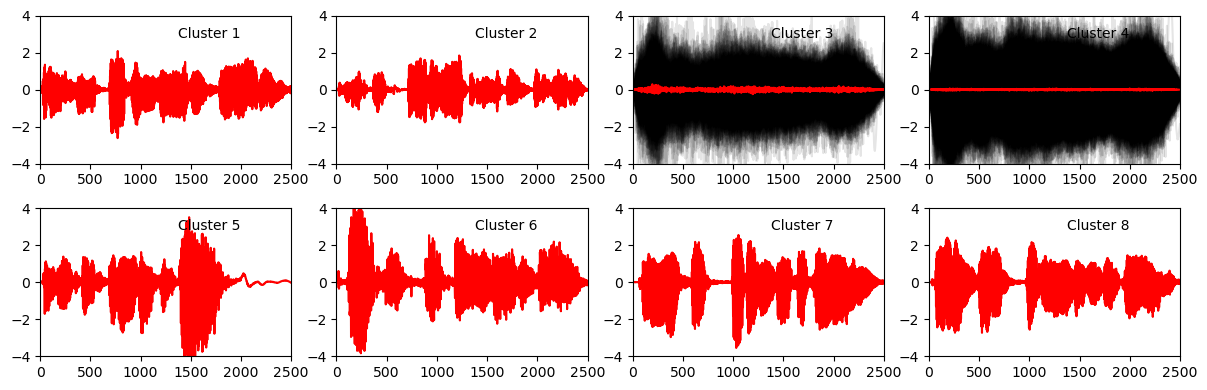

In [170]:
sz = subX.shape[1]
plt.figure(figsize=(12, 4))

for yi in range(8):
    plt.subplot(2, 4, yi+1)
    for xx in subX[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.1)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [167]:
# Calculate the silhouette score
#labels = y_pred.labels_
silhouette_score(subX, y_pred, metric='euclidean', n_jobs=-1)

0.0011051934023307965

# "Shape" plot

In [10]:
%%time

X1 = X_train_cleaned[mask_fearfulM]
X2 = X_train_cleaned[mask_surprisedM]
X3 = X_train_cleaned[mask_calmM]
X4 = X_train_cleaned[mask_disgustM]
X5 = X_train_cleaned[mask_sadM]
X6 = X_train_cleaned[mask_happyM]
X7 = X_train_cleaned[mask_angryM]

CPU times: total: 0 ns
Wall time: 2 ms


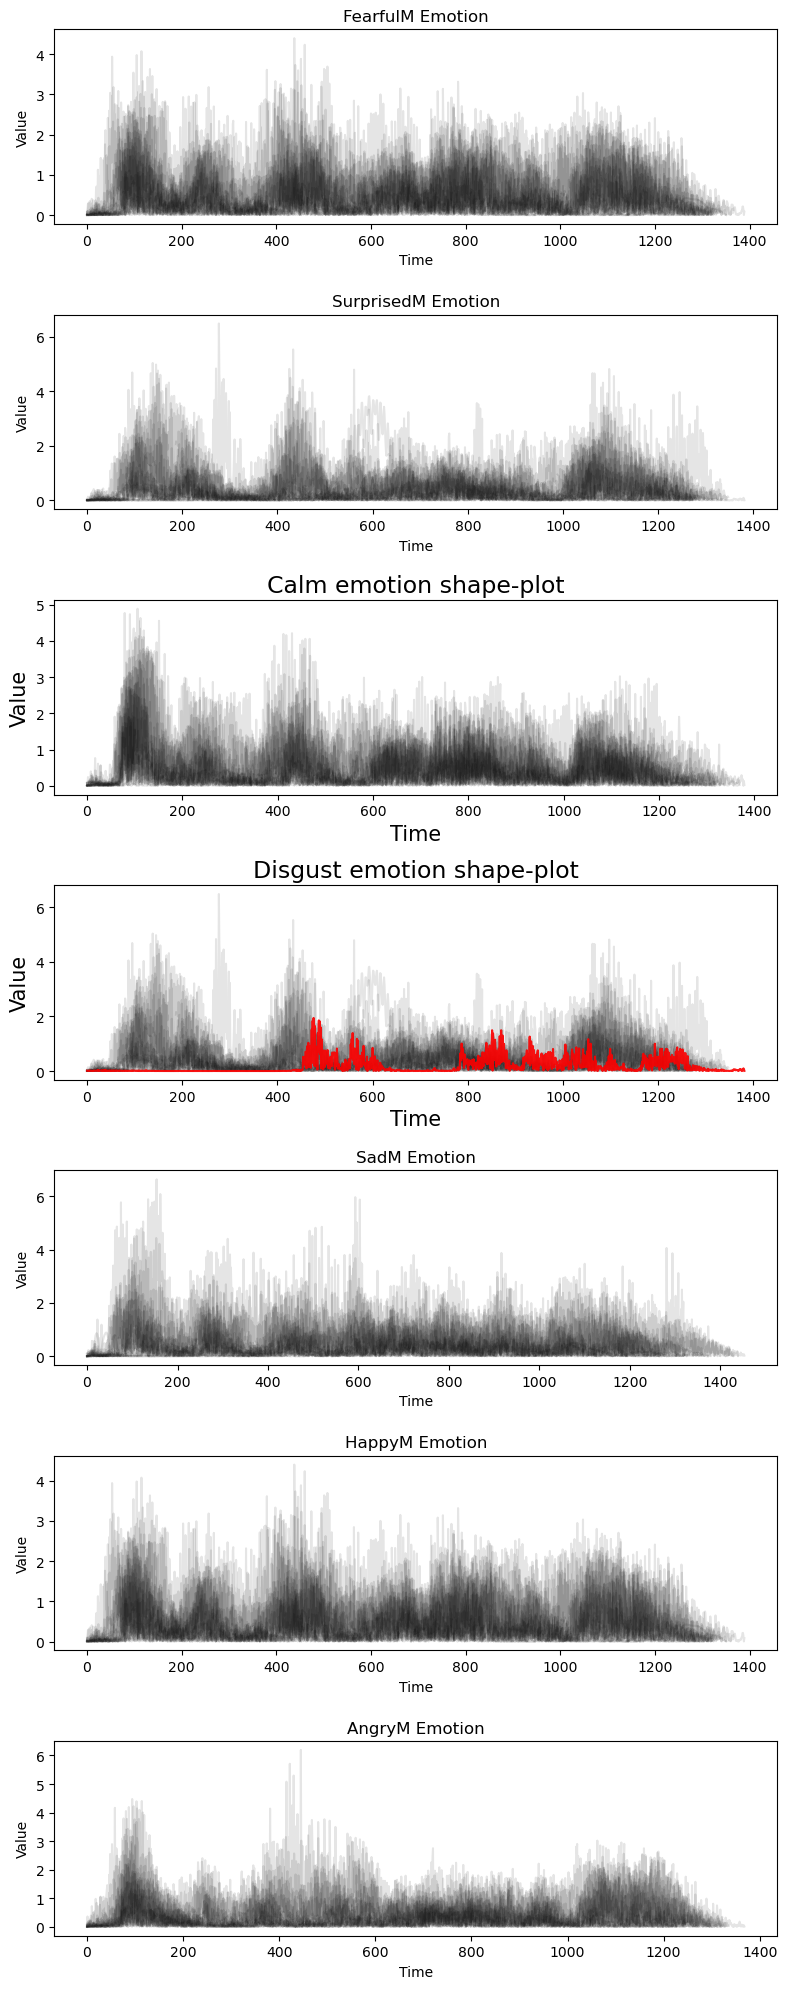

In [87]:
opacity = 0.1
color = 'black'
thr = 0


# Create a figure and multiple axes (subplots)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8, 20))

# Plot fearfulM time series
for i in range(X1.shape[0]):
    series = X1[i, :]
    mask = series > thr
    axes[0].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for fearfulM subplot
axes[0].set_title("FearfulM Emotion")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")

# Plot surprisedM time series
for i in range(X2.shape[0]):
    series = X2[i, :]
    mask = series > thr
    axes[1].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for surprisedM subplot
axes[1].set_title("SurprisedM Emotion")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")

# Plot calmM time series
for i in range(X3.shape[0]):
    series = X3[i, :]
    mask = series > thr
    axes[2].plot(series[mask], color=color, alpha=opacity)
#series = X_train_cleaned[indices_calmM][2]
#mask = series > thr
#axes[2].plot(series[mask], color="blue", alpha=0.3)

# Set plot title and labels for calmM subplot
axes[2].set_title("Calm emotion shape-plot", fontsize=17)
axes[2].set_xlabel("Time", fontsize=15)
axes[2].set_ylabel("Value", fontsize=15)

# Plot disgustM time series
for i in range(X4.shape[0]):
    series = X4[i, :]
    mask = series > thr
    axes[3].plot(series[mask], color=color, alpha=opacity)
series = merged_X[20]
mask = series > thr
axes[3].plot(series[mask], color="red", alpha=0.9)

# Set plot title and labels for disgustM subplot
axes[3].set_title("Disgust emotion shape-plot", fontsize=17)
axes[3].set_xlabel("Time", fontsize=15)
axes[3].set_ylabel("Value", fontsize=15)

# Plot sadM time series
for i in range(X5.shape[0]):
    series = X5[i, :]
    mask = series > thr
    axes[4].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for sadM subplot
axes[4].set_title("SadM Emotion")
axes[4].set_xlabel("Time")
axes[4].set_ylabel("Value")

# Plot happyM time series
for i in range(X6.shape[0]):
    series = X6[i, :]
    mask = series > thr
    axes[5].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for happyM subplot
axes[5].set_title("HappyM Emotion")
axes[5].set_xlabel("Time")
axes[5].set_ylabel("Value")

# Plot angryM time series
for i in range(X7.shape[0]):
    series = X7[i, :]
    mask = series > thr
    axes[6].plot(series[mask], color=color, alpha=opacity)

# Set plot title and labels for angryM subplot
axes[6].set_title("AngryM Emotion")
axes[6].set_xlabel("Time")
axes[6].set_ylabel("Value")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Transactional Clustering

In [2]:
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:
%%time
Y_train = pd.read_csv("RavdessTimeSeries_Y_train.csv")
X_train = np.load("RavdessTimeSeriesTrim_X_train.npy")

NameError: name 'pd' is not defined

In [1]:
#selecting a subset of X
mask_sub = (Y_train['sex']=='M')&(Y_train['statement']=='Dogs are sitting by the door')&(Y_train["vocal_channel"]=='speech')&(Y_train["emotional_intensity"]=='normal')
#(Y_train['sex']=='M')&(Y_train["vocal_channel"]=='speech')&(Y_train["emotional_intensity"]=='normal')
indices_sub = Y_train.index[mask_sub]
sub_X = X_train[indices_sub]
sub_Y = Y_train.loc[indices_sub]
sub_X.shape

NameError: name 'Y_train' is not defined

In [192]:
%%time
#6 s for 540 records
#noise removing

w = 16
sub_X_cleaned = []

for ts_array in sub_X:
    # Convert ts_array to a pandas Series
    ts_series = pd.Series(ts_array)
    # Calculate ts_det using rolling mean
    ts_det = ((ts_series - ts_series.mean()) / ts_series.std()).rolling(window=w).mean()
    # Convert ts_det back to a NumPy array
    cleaned_array = ts_det.to_numpy()
    sub_X_cleaned.append(cleaned_array)

sub_X = np.array(sub_X_cleaned)

CPU times: total: 1.86 s
Wall time: 1.85 s


In [244]:
%%time
#Rescale time series
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
sub_X = scaler.fit_transform(sub_X)#.reshape(1,-1))

KeyboardInterrupt: 

In [193]:
sub_X = sub_X[:, 2000:243000]
sub_X.shape

(144, 241000)

In [196]:
%%time
#6 min with 64 symbols and 2000 segments
n_sax_symbols = 64
segments= 2500
sax = SymbolicAggregateApproximation(n_segments=segments, 
                                     alphabet_size_avg=n_sax_symbols,
                                    scale=False)
X_sax = sax.fit_transform(sub_X)

C:\Users\linov\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 144 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


CPU times: total: 1min 49s
Wall time: 1min 49s


In [197]:
X_sax_sample = X_sax#[:, 1000:1500, :]
X_sax_sample.shape

(144, 2500, 1)

# TX-Means

In [10]:
import os, sys, importlib
from os.path import expanduser
from pathlib import Path

# TO DO: Better way to add to PythonPath the package.
home = str(Path.home())

## MODIFY HERE! ##
# This need to point on the folder where you clone the repo (respect to the home...)
Folder_Cloned_In = '/Desktop/' # Change here..
##################

# Full dir name
path_to_lib = home + Folder_Cloned_In

if os.path.isdir(path_to_lib + 'TXMeans'):
    print(f'My Home is: {home}')
    print(f'I cloned in: {path_to_lib}')
    # Add dirs to Python Path 
    sys.path.insert(0, path_to_lib + 'TXMeans/code')
    sys.path.insert(0, path_to_lib + 'TXMeans/code/algorithms')
else:
    print("Can't find Directory.")
    print('For example: you are in')
    print(str(os.getcwd()))

My Home is: C:\Users\linov
I cloned in: C:\Users\linov/Desktop/


In [11]:
import algorithms.txmeans
from algorithms.txmeans import TXmeans # The class (like sklearn)
from algorithms.txmeans import remap_items, count_items, sample_size # Util functions
from algorithms.txmeans import basket_list_to_bitarray, basket_bitarray_to_list # Converting(Reverting) to(from) bitarray
from generators.datamanager import read_uci_data # (Convert the data in nice basket format)
from validation.validation_measures import delta_k, purity, normalized_mutual_info_score # Measure of Validation
from algorithms.util import jaccard_bitarray

import pandas as pd
import numpy as np
import IPython.display as ipd
import datetime

In [198]:
reshaped_X_sax = X_sax_sample.reshape(144, 2500)
df = pd.DataFrame(reshaped_X_sax)
column_names = [f"Time_{i}" for i in range(2500)]
df.columns = column_names
df

,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,...,Time_2490,Time_2491,Time_2492,Time_2493,Time_2494,Time_2495,Time_2496,Time_2497,Time_2498,Time_2499
0,61,18,10,48,57,35,20,40,53,36,...,35,34,34,36,38,40,35,32,34,31
1,1,1,5,4,39,63,62,9,15,61,...,31,37,38,32,33,29,24,25,28,27
2,7,1,18,63,49,7,57,57,8,48,...,30,35,32,32,38,35,36,34,36,32
3,3,2,5,60,63,13,24,62,38,15,...,34,35,34,34,32,33,33,31,31,30
4,36,29,7,6,43,56,14,34,54,16,...,30,34,34,31,31,31,29,29,33,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,27,26,0,45,61,31,32,0,56,53,...,34,34,34,35,35,35,35,35,35,35
140,0,63,63,0,9,63,48,7,62,59,...,29,29,27,22,31,37,29,30,36,33
141,32,32,32,32,32,31,31,32,31,31,...,30,35,29,31,34,31,32,31,31,30
142,33,32,30,31,32,32,31,32,32,30,...,33,28,29,27,30,30,29,32,35,37


In [199]:
df = pd.concat([df, sub_Y.reset_index(drop=True)['emotion']], axis=1)
df

,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,...,Time_2491,Time_2492,Time_2493,Time_2494,Time_2495,Time_2496,Time_2497,Time_2498,Time_2499,emotion
0,61,18,10,48,57,35,20,40,53,36,...,34,34,36,38,40,35,32,34,31,neutral
1,1,1,5,4,39,63,62,9,15,61,...,37,38,32,33,29,24,25,28,27,neutral
2,7,1,18,63,49,7,57,57,8,48,...,35,32,32,38,35,36,34,36,32,calm
3,3,2,5,60,63,13,24,62,38,15,...,35,34,34,32,33,33,31,31,30,calm
4,36,29,7,6,43,56,14,34,54,16,...,34,34,31,31,31,29,29,33,30,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,27,26,0,45,61,31,32,0,56,53,...,34,34,35,35,35,35,35,35,35,fearful
140,0,63,63,0,9,63,48,7,62,59,...,29,27,22,31,37,29,30,36,33,disgust
141,32,32,32,32,32,31,31,32,31,31,...,35,29,31,34,31,32,31,31,30,disgust
142,33,32,30,31,32,32,31,32,32,30,...,28,29,27,30,30,29,32,35,37,surprised


https://github.com/riccotti/TX-Means/blob/master/HowToUse.ipynb

In [200]:
df.to_csv('ravdess_transactional.csv', index=False)

In [183]:
#class index
df.iloc[:, 2500]

0     happy
1     happy
2     angry
3     angry
4     happy
5     happy
6     angry
7     angry
8     happy
9     happy
10    angry
11    angry
12    happy
13    happy
14    angry
15    angry
16    happy
17    happy
18    angry
19    angry
20    happy
21    happy
22    angry
23    angry
24    happy
25    happy
26    angry
27    angry
28    happy
29    happy
30    angry
31    angry
32    happy
33    happy
34    angry
35    angry
Name: emotion, dtype: object

In [201]:
txmeans_model = TXmeans()

class_index = 2500
baskets_real_labels, maps = read_uci_data('ravdess_transactional.csv', class_index=class_index)
print( 'ravdess', len(baskets_real_labels))

C:\Users\linov/Desktop/TXMeans/code\generators\datamanager.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(df[k])[0][0]


ravdess 144


In [202]:
# Save baskets and the real labels 
baskets_list = list()
real_labels = list()
count = 0
for basket, label in baskets_real_labels:
    baskets_list.append(basket)
    real_labels.append(label)
    count += 1
    
# Speeding up the Jaccard distance: 
baskets_list, map_newitem_item, map_item_newitem = remap_items(baskets_list)

baskets_list = basket_list_to_bitarray(baskets_list, len(map_newitem_item))

# Get the number of baskets (equal to number of data) 
nbaskets = len(baskets_list)

# Get the number of different item
nitems = count_items(baskets_list)

start_time = datetime.datetime.now()

#fit the model
txmeans_model.fit(baskets_list, nbaskets, nitems)

end_time = datetime.datetime.now()
running_time = end_time - start_time

# Get the label and the clusters 
res = txmeans_model.clustering

In [203]:
print(running_time)

0:00:04.654775


In [204]:
# Number of iteration of the model for the convergence
iter_count = txmeans_model.iter_count
iter_count

1

In [205]:
# Initialize empty predicted labels
pred_labels = [0] * len(real_labels)

# Initialize empty cluster list
baskets_clusters = list()
for label, cluster in enumerate(res):
    # Revert the bitarray transform.
    cluster_list = basket_bitarray_to_list(cluster['cluster']).values()
    for bid, bitarr in cluster['cluster'].items():
        # Labels of every data point
        pred_labels[bid] = label
        # Clusters
        baskets_clusters.append(cluster_list)

In [206]:
# Mesure of "goodness" for clustering algorithm respect to the target attribute
print('delta_k', delta_k(real_labels, pred_labels))
print('normalized_mutual_info_score', normalized_mutual_info_score(real_labels, pred_labels))
print('purity', purity(real_labels, pred_labels))
print(f'Num of Clusters: {len(np.unique(np.array(pred_labels)))}')

delta_k -7
normalized_mutual_info_score 0.0
purity 0.125
Num of Clusters: 1
